In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r'E:/fingertips/python/project/project_3/Python_Linear_Regres (1).csv'
df= pd.read_csv(path)

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
for k in df.columns:
    if df[k].dtype == "O":
        print('Categorical counts for',k,": ")
        print(df[k].value_counts())
        print(" ")

Categorical counts for sex : 
male      676
female    662
Name: sex, dtype: int64
 
Categorical counts for smoker : 
no     1064
yes     274
Name: smoker, dtype: int64
 
Categorical counts for region : 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
 


In [8]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### From the above results it looks like that data is balanced for male and female and also for various regions

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Univariate data analysis

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

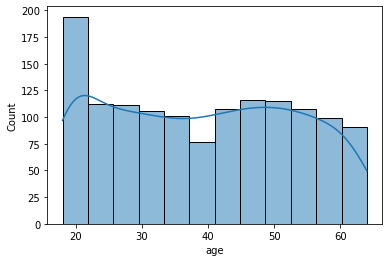

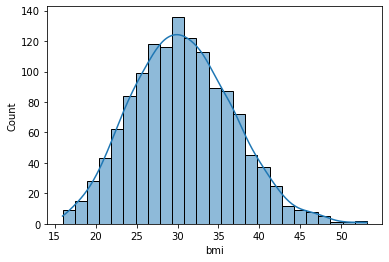

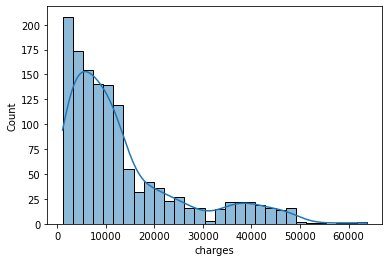

In [13]:
for k in ["age","bmi","charges"]:
    plt.figure()
    sns.histplot(df[k],kde=True)

### age is uniformally distributed, bmi is normally distributed, charges are right skewed

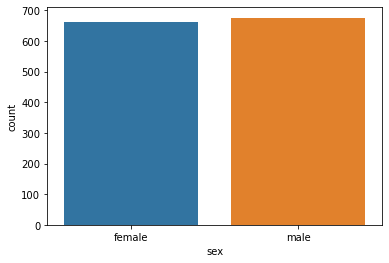

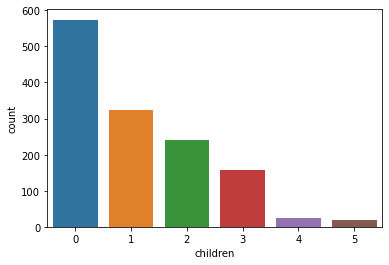

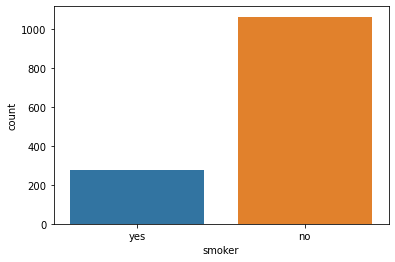

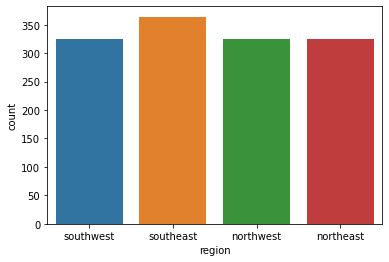

In [14]:
for k in ['sex', 'children', 'smoker', 'region']:
    plt.figure()
    sns.countplot(df[k])

###  Gender,region are balanced in the dataset, there are few smokers than non-smokers and count of children is highest for 0 children and decreases as number goes from 0 to 5  

# Bivariate analysis

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='age', ylabel='charges'>

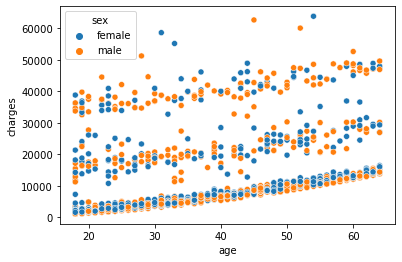

In [16]:
sns.scatterplot(data=df,x="age",y='charges',hue="sex")

<AxesSubplot:xlabel='age', ylabel='charges'>

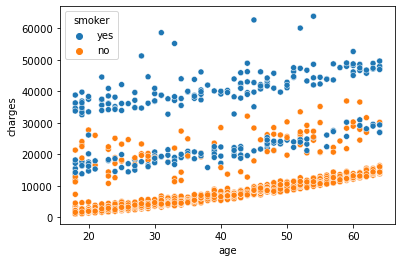

In [17]:
sns.scatterplot(data=df,x="age",y='charges',hue="smoker")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

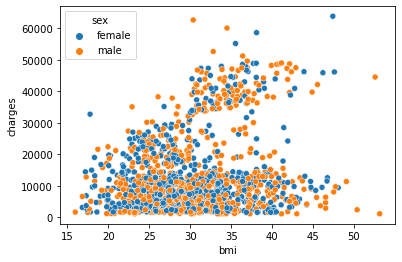

In [18]:
sns.scatterplot(data=df,x="bmi",y='charges',hue="sex")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

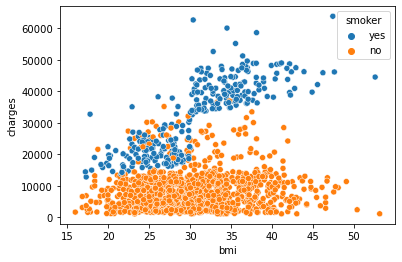

In [19]:
sns.scatterplot(data=df,x="bmi",y='charges',hue="smoker")

### Clusters are easily visible when smoker is set as hue, few conclusions are made here
### (1) As age increase the charges increase, 
### (2) But if one is a smoker and even if one has small age than a non smoker one will have to pay more insurance charge. That means smoking is a more important feature compared to age
### (3) Bmi is positively correlated with charges when one is smoker
### (4) Charges are almost constant for insurance when Bmi increases but one has to be a non-smoker for it. 

<AxesSubplot:xlabel='children', ylabel='charges'>

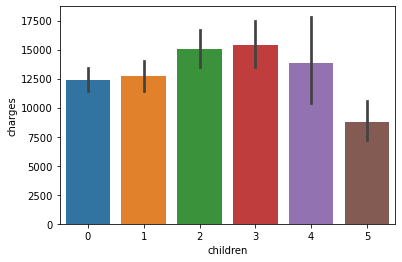

In [20]:
sns.barplot(data=df,x="children",y='charges')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

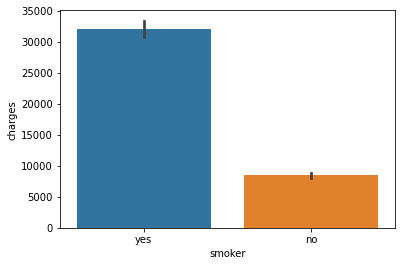

In [21]:
sns.barplot(data=df,x="smoker",y='charges')

<AxesSubplot:xlabel='region', ylabel='charges'>

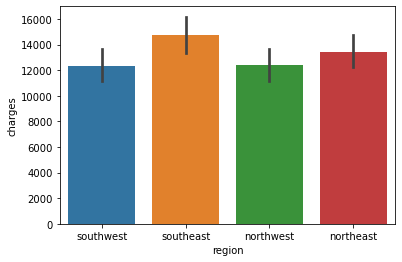

In [22]:
sns.barplot(data=df,x="region",y='charges')

### (1) Avg. charges for insurance increase when count of children increase from 0 to 3 and afterwards it starts decreasing
### (2) Avg. charges for insurance is high when one is smoker
### (3) The Avg. charges for insurance has very minor effect due to change in region data as seen on the barplot (But this is due to very minor region data imbalance). 

# Checking for outliers

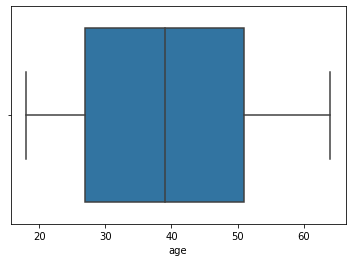

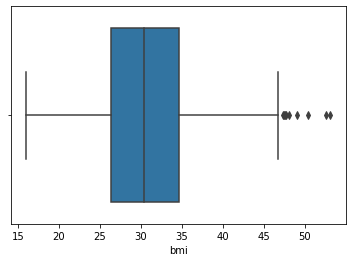

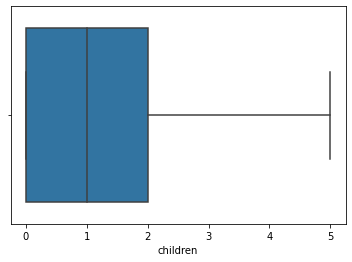

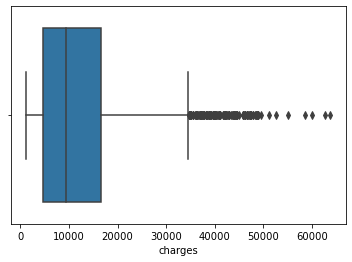

In [23]:
for k in df.columns:
    if df[k].dtype != "O":
        plt.figure()
        sns.boxplot(df[k])

### Box plot is sensitive to outlier limits so putting outlier values manually using scatter plots

In [24]:
filt = df["bmi"] > 50

df.loc[filt].count()*100/df.shape[0]

age         0.224215
sex         0.224215
bmi         0.224215
children    0.224215
smoker      0.224215
region      0.224215
charges     0.224215
dtype: float64

### 0.22% outliers in bmi data

In [25]:
filt = df["charges"] > 50000

df.loc[filt].count()*100/df.shape[0]

age         0.523169
sex         0.523169
bmi         0.523169
children    0.523169
smoker      0.523169
region      0.523169
charges     0.523169
dtype: float64

### 0.52% outlier in charges data

### So we will remove outliers from the data

In [26]:
filt = (df["charges"] < 50000) & (df["bmi"] < 50)
df= df.loc[filt]
df.reset_index().drop("index",axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Now some miscellaneous data analysis:

### region wise male, female count

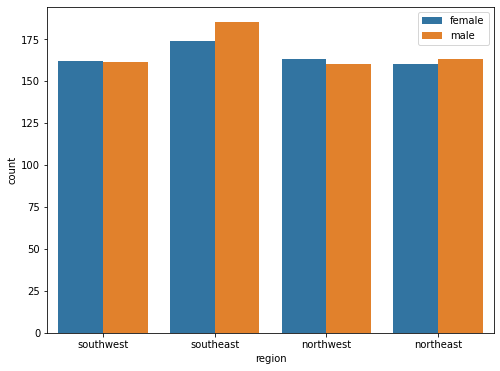

In [27]:
plt.figure(figsize=(8,6))

sns.countplot(data=df,x="region",hue='sex')
plt.legend(loc="upper right")

### region wise avg. children count 

<AxesSubplot:xlabel='region', ylabel='children'>

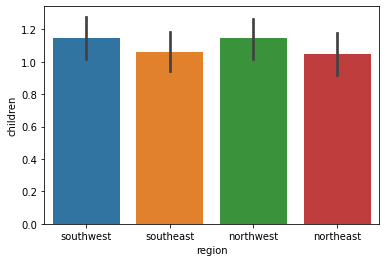

In [28]:
sns.barplot(data=df,x="region",y='children')

### Smoking based on gender

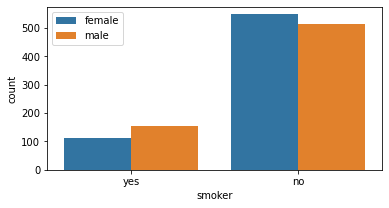

In [29]:
plt.figure(figsize=(6,3))

sns.countplot(data=df,x="smoker",hue='sex')
plt.legend(loc="upper left")

### region wise smokers

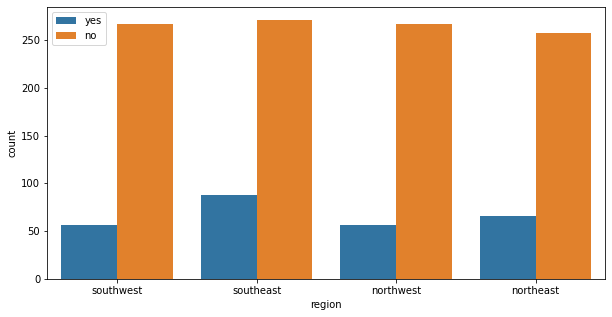

In [30]:
plt.figure(figsize=(10,5))

sns.countplot(data=df,x="region",hue='smoker')
plt.legend(loc="upper left")

### smoker and bmi 

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

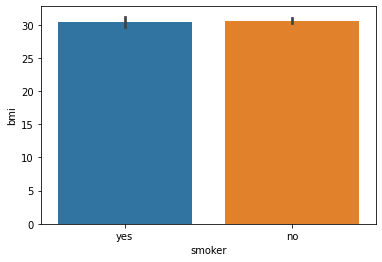

In [31]:
sns.barplot(data=df,x="smoker",y='bmi')

### Age and Bmi relation

<AxesSubplot:xlabel='age', ylabel='bmi'>

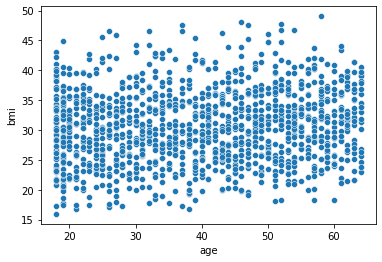

In [32]:
sns.scatterplot(data=df,x="age",y='bmi')

# Encoding all categorical features

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
encoded_df  = pd.DataFrame()
for k in df.columns:
    if df[k].dtype == "O":
        encoded_df[k] = encoder.fit_transform(df[k])

encoded_df.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


# Separating the numerical and categorical variables before scaling numerical variables

In [35]:
num_df = pd.DataFrame()
for k in df.columns:
    if df[k].dtype != "O":
        num_df[k] = df[k]

num_df = num_df.drop(["children"],axis=1)
num_df.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


### As children variable is more like a categorical variable, it need to be removed from numerical df and added to categorical df.

In [36]:
cat_df = encoded_df 
cat_df["children"] = df["children"].reset_index().drop("index",axis=1)
cat_df.head()

,sex,smoker,region,children
0,0,1,3,0
1,1,0,2,1
2,1,0,2,3
3,1,0,1,0
4,1,0,1,0


In [37]:
unscaled_df = pd.concat([cat_df,num_df],axis=1,ignore_index=False)

unscaled_df.head()

,sex,smoker,region,children,age,bmi,charges
0,0.0,1.0,3.0,0.0,19.0,27.900,16884.92400
1,1.0,0.0,2.0,1.0,18.0,33.770,1725.55230
2,1.0,0.0,2.0,3.0,28.0,33.000,4449.46200
3,1.0,0.0,1.0,0.0,33.0,22.705,21984.47061
4,1.0,0.0,1.0,0.0,32.0,28.880,3866.85520


In [38]:
correlation_linear  = unscaled_df.corr(method="pearson")
correlation_nonlinear  = unscaled_df.corr(method="spearman")

In [39]:
correlation_linear

,sex,smoker,region,children,age,bmi,charges
sex,1.000000,0.075255,0.000589,0.016864,0.022553,0.024184,-0.004134
smoker,0.075255,1.000000,-0.004433,0.010855,-0.019786,-0.016052,0.056491
region,0.000589,-0.004433,1.000000,0.018760,0.009020,0.023395,0.002287
children,0.016864,0.010855,0.018760,1.000000,-0.028699,0.017011,-0.024461
age,0.022553,-0.019786,0.009020,-0.028699,1.000000,0.120591,0.306737
bmi,0.024184,-0.016052,0.023395,0.017011,0.120591,1.000000,0.188083
charges,-0.004134,0.056491,0.002287,-0.024461,0.306737,0.188083,1.000000


In [40]:
correlation_nonlinear

,sex,smoker,region,children,age,bmi,charges
sex,1.000000,0.075255,0.000619,0.015063,0.022982,0.031095,-0.007073
smoker,0.075255,1.000000,-0.004385,0.019712,-0.020711,-0.019225,0.044655
region,0.000619,-0.004385,1.000000,0.012820,0.008276,0.020023,-0.000056
children,0.015063,0.019712,0.012820,1.000000,-0.034881,0.011539,-0.021839
age,0.022982,-0.020711,0.008276,-0.034881,1.000000,0.113010,0.537519
bmi,0.031095,-0.019225,0.020023,0.011539,0.113010,1.000000,0.114728
charges,-0.007073,0.044655,-0.000056,-0.021839,0.537519,0.114728,1.000000


###  Smoker, bmi has linear correlation with charges and children, age have nonlinear correlation with charges

<AxesSubplot:>

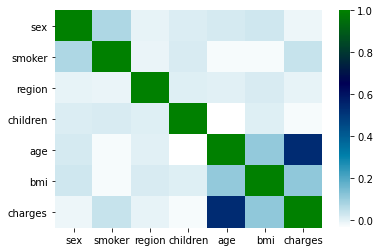

In [41]:
sns.heatmap(correlation_nonlinear,cmap="ocean_r")

# Scaling the numerical df

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaled_df =   pd.DataFrame(scaler.fit_transform(num_df.drop(["charges"],axis=1)),columns=num_df.columns.drop(["charges"]))

In [45]:
scaled_df

,age,bmi
0,-1.440482,-0.446893
1,-1.511699,0.530229
2,-0.799529,0.402055
3,-0.443444,-1.311654
4,-0.514661,-0.283762
...,...,...
1323,0.767245,0.064140
1324,-1.511699,0.222278
1325,-1.511699,1.042927
1326,-1.298048,-0.796459


In [46]:
final_df = pd.concat([scaled_df.reset_index(),cat_df.reset_index()],axis=1)
final_df = final_df.drop(["index"],axis=1)
final_df["charges"] = df["charges"].reset_index().drop(["index"],axis=1)
final_df.head()

,age,bmi,sex,smoker,region,children,charges
0,-1.440482,-0.446893,0,1,3,0,16884.92400
1,-1.511699,0.530229,1,0,2,1,1725.55230
2,-0.799529,0.402055,1,0,2,3,4449.46200
3,-0.443444,-1.311654,1,0,1,0,21984.47061
4,-0.514661,-0.283762,1,0,1,0,3866.85520


In [47]:
final_df.isnull().sum()

age         0
bmi         0
sex         0
smoker      0
region      0
children    0
charges     0
dtype: int64

# Model training time

In [48]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = final_df.drop(["charges"],axis=1)
Y= final_df["charges"]

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7,random_state=42)

In [52]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [53]:
ridge_reg.fit(xtrain,ytrain)

Ridge(alpha=1)

In [54]:
lasso_reg.fit(xtrain,ytrain)

Lasso(alpha=1)

# Linear regression

### Training performance

In [55]:
xtrain.columns

Index(['age', 'bmi', 'sex', 'smoker', 'region', 'children'], dtype='object')

In [56]:
training_prediction = lin_reg.predict(xtrain)
print("R2 score",r2_score(ytrain,training_prediction))
print("MAE",mean_absolute_error(ytrain,training_prediction))
print("MSE",mean_squared_error(ytrain,training_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytrain,training_prediction)))
print("Intercept",lin_reg.intercept_)
print("Coefficient",lin_reg.coef_)

R2 score 0.7498362510878362
MAE 4096.60376626069
MSE 34633290.560186535
RMSE 5885.00557010667
Intercept 8599.309302694746
Coefficient [ 3677.87626202  1866.14165451    62.34004918 23398.0528313
  -497.80893155   546.36460292]


### Testing performance

In [57]:
testing_prediction = lin_reg.predict(xtest)
print("R2 score",r2_score(ytest,testing_prediction))
print("MAE",mean_absolute_error(ytest,testing_prediction))
print("MSE",mean_squared_error(ytest,testing_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytest,testing_prediction)))

R2 score 0.7566699202369567
MAE 4009.7709979861725
MSE 31819399.22240158
RMSE 5640.868658495922


# Ridge regression

### Training performance

In [58]:
training_prediction = ridge_reg.predict(xtrain)
print("R2 score",r2_score(ytrain,training_prediction))
print("MAE",mean_absolute_error(ytrain,training_prediction))
print("MSE",mean_squared_error(ytrain,training_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytrain,training_prediction)))
print("Intercept",ridge_reg.intercept_)
print("Coefficient",ridge_reg.coef_)

R2 score 0.7498071201402123
MAE 4109.003938093049
MSE 34637323.52090822
RMSE 5885.348207277818
Intercept 8624.465271871462
Coefficient [ 3673.42284465  1863.5189156     73.69691601 23237.7163958
  -497.24510864   546.22236484]


### Testing performance

In [59]:
testing_prediction = ridge_reg.predict(xtest)
print("R2 score",r2_score(ytest,testing_prediction))
print("MAE",mean_absolute_error(ytest,testing_prediction))
print("MSE",mean_squared_error(ytest,testing_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytest,testing_prediction)))

R2 score 0.7569633600791403
MAE 4017.2180912160575
MSE 31781027.149802532
RMSE 5637.466376822352


# Lasso regression

### Training performance

In [60]:
training_prediction = lasso_reg.predict(xtrain)
print("R2 score",r2_score(ytrain,training_prediction))
print("MAE",mean_absolute_error(ytrain,training_prediction))
print("MSE",mean_squared_error(ytrain,training_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytrain,training_prediction)))
print("Intercept",lasso_reg.intercept_)
print("Coefficient",lasso_reg.coef_)

R2 score 0.7498361550830916
MAE 4096.79097620164
MSE 34633303.85132174
RMSE 5885.006699343829
Intercept 8601.381080110717
Coefficient [ 3676.94219317  1865.05982015    58.76408799 23392.07131648
  -496.75985064   545.69302339]


### Testing performance

In [61]:
testing_prediction = lasso_reg.predict(xtest)
print("R2 score",r2_score(ytest,testing_prediction))
print("MAE",mean_absolute_error(ytest,testing_prediction))
print("MSE",mean_squared_error(ytest,testing_prediction))
print("RMSE",np.sqrt(mean_squared_error(ytest,testing_prediction)))

R2 score 0.7567039727333791
MAE 4009.446986047438
MSE 31814946.29993823
RMSE 5640.473942847199


In [62]:
df.shape

(1328, 7)

### from 1338 to 1328 we only removed 10 data points which were outliers (0.75% data removed)

###  Removing outliers definately helped us improving model performance